# NEURAL NETWORKS AND DEEP LEARNING, part 1

Contents of this excercise:
   
1. [Introduction](#1)
    1. [Overview the dataset](#2)
1. [Logistic Regression](#3)
    1. [Computation graph](#4)
    1. [Initializing parameters](#5)
    1. [Feed Forward](#6)
    1. [Back propagation - optimization using Gradient Descent](#7)
    1. [Logistic Regression with Sklearn](#8)
    1. [TODO No. 1: Compare logistic regression and SVM to classify 3 and 8 signes](#9)


<a id="1"></a> <br>
## 1. INTRODUCTION
* **Deep learning**: One of the machine learning technique that learns features directly from data.
* **Why deep learning**: When the amount of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance, e.g. accuracy.
* **What is "big" amount of data**: It is hard to answer, but nowadays we are dealing with millions of samples 
* **Application areas of deep learning**: Speech recognition, image classification, natural language procession (NLP), recommendation systems…
* **What is difference between deep learning and machine learning**:
    * Machine learning includes deep learning.
    * Features are given to machine learning manually.
    * On the other hand, deep learning most commonly learns features directly from data.

<a href="http://ibb.co/f8Epqx"><img src="http://preview.ibb.co/hgpNAx/2.png" alt="2" border="0"></a>

<br>Let's start.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn import svm


<a id="Overview the Data Set"></a> <br>
### 1.1 Dataset overview
* We will use sign language digits data set.
* There are 2062 sign language digits images in this dataset.
* As you know digits are numbers from 0 to 9, therefore there are 10 unique signs.
* At the beginning of this exercise we will use only sign 0 and 1 for simplicity. 
* In oue dataset, sign zero is between indexes 204 and 408, so number of samples is 205.
* Also sign one is between indexes 822 and 1027, with number of samples 206. Therefore, we will use 205 samples from each class (label).
* Note: Actually 205 samples is not enough for deep learning, but the priciple stays the same. 
* Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

(2062, 64, 64)


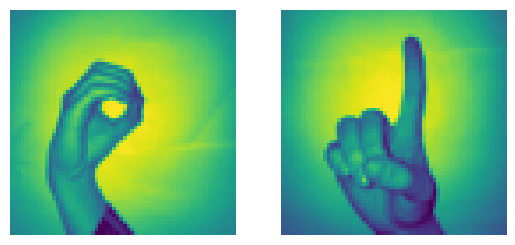

In [2]:
# load data set
x_l = np.load('./input/Sign-language-digits-dataset/X.npy')
Y_l = np.load('./input/Sign-language-digits-dataset/Y.npy')
print(x_l.shape)
plt.subplot(1, 2, 1)
plt.imshow(x_l[408])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[1000])
plt.axis('off')
plt.show()

* In order to create the images array for training, we should concatenate zero sign and one sign arrays
* Then we should create label (target) array, with labels: 0 for zero sign images and 1 for one sign images.

In [3]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1) 
* Lets split X and Y into train and test sets.
    * test_size = percentage of test size (test = 15% and train = 85%)
    * random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [4]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train)
print(number_of_test)
print(X_train.shape)
print(Y_train.shape)

348
62
(348, 64, 64)
(348, 1)


* Now we have 3 dimensional input array (X) so we need to flatten it (2D) in order to use it as an input for our first deep learning model.
* Our label array (Y) is already flatten (2D) so we leave it like that.
* Lets flatten X array (images array).


In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* As you can see, we have 348 images and each image has 4096 pixels in image train array.
* Also, we have 62 images and each image has 4096 pixels in image test array.
* Then lets transpose our data (not necessary, but following code looks more "clean" with this)

In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


<font color='purple'>
Our final inputs (images) and outputs (labels or classes) look like this:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

<a id="3"></a> <br>
## 2. Logistic Regression
**Logistic regression is a very simple neural network!** 


<a id="4"></a> <br>
### 2.1  Computation graph


* Computation graph of logistic regression
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
    * Input: *x* = [px1 px2 … px4096]
    * Target: *y* has value 0 or 1
    * Weights: *w* = [w1 w2 … w4096]
    * Output: *y_head* is in range (0,1)
    * *z = (w.T)x + b*  => z equals to (transpose of weights times input x) + bias 
    * => *z = b + px1*w1 + px2*w2 + ... + px4096*w4096*
    * *y_head = sigmoid(z)*


<a id="5"></a> <br>
### 2.2 Initializing parameters
* Input is the set of our images (each image in x_train has 4096 pixels).
* Each pixel has its own weights.
* The first step is multiplying pixels with their own weights.
* The question is that what is the initial value of weights?
    * You can randomly select initial values, or you can use some specialized techniques.
    * For simplicity let's assume for now that initial weights are equal to 0.01 and that initial bias is 0.


In [7]:
# Short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# let's initialize parameters
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [8]:
w,b = initialize_weights_and_bias(4096)
print(w)
print(b)

[[0.01]
 [0.01]
 [0.01]
 ...
 [0.01]
 [0.01]
 [0.01]]
0.0


<a id="6"></a> <br>
### 2.3 Feed Forward
* *z = (w.T)x + b*
* *y_head = sigmoid(z)*
* Then we calculate loss function
    * *J = - (1-y) log(1- y_head) - y log(y_head)*



In [9]:
# Definition of sigmoid
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [10]:
y_head = sigmoid(0)
y_head

np.float64(0.5)

In [11]:
# Forward propagation steps:
    # find z = w.T*x+b
    # y_head = sigmoid(z)
    # loss(error) = loss(y,y_head)
    # cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probability 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    return cost 

<a id="7"></a> <br>
### 2.4  Back propagation - optimization using Gradient Descent

* In order to decrease cost, we need to update weights and bias - gradient descent.
* Recap from our lectures:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_h - y)^T$$
<br>
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_h-y)$$

* For math enthusiasts https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d 

In [12]:
# In back propagation we will use y_head calculated previously
# Therefore instead of writing back propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost,gradients

In [13]:
# Updating (learning) parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating (learning) parameters is performed number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # update (learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [14]:
 # prediction
def predict(w,b,x_test):
    # x_test is an input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z > 0.5, our prediction is sign one (y_head=1),
    # if z <= 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# predict(parameters["weight"],parameters["bias"],x_test)

* Now let's put all together.

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


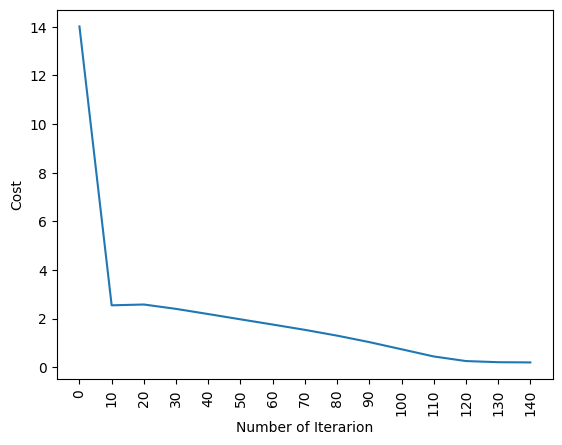

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [15]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, num_iterations = 150)

<a id="8"></a> <br>
### 2.5 Logistic Regression with Sklearn
* Now let's do all of these in one line of code :-)
* In sklearn library, there is a logistic regression method that ease implementing logistic regression.
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [16]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 1000)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

c:\Users\mayow\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy: 0.967741935483871 


c:\Users\mayow\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 1.0 


<a id="9"></a> <br>
### TODO No. 1: Compare logistic regression and SVM to classify 3 and 8 signs

* Sort out the problem causing the warning in the previous cell. Why this happend?
* Apply manually defined logistic regression, with couple of different learning rate values
* Apply sklearn based logistic regression and tune learning rate
* Apply SVM
* Compare all results

In [17]:
logreg = linear_model.LogisticRegression(random_state=42, max_iter=1000)

# Ensure y_train and y_test are 1D arrays
y_train_1d = y_train.ravel()
y_test_1d = y_test.ravel()

print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train_1d).score(x_test.T, y_test_1d)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train_1d).score(x_train.T, y_train_1d)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


Learning rate: 0.001
Cost after iteration 0: 14.014222
Cost after iteration 10: 9.140082
Cost after iteration 20: 4.266320
Cost after iteration 30: 0.700054
Cost after iteration 40: 0.672925
Cost after iteration 50: 0.660285
Cost after iteration 60: 0.648153
Cost after iteration 70: 0.636504
Cost after iteration 80: 0.625316
Cost after iteration 90: 0.614567
Cost after iteration 100: 0.604235
Cost after iteration 110: 0.594302
Cost after iteration 120: 0.584747
Cost after iteration 130: 0.575551
Cost after iteration 140: 0.566698


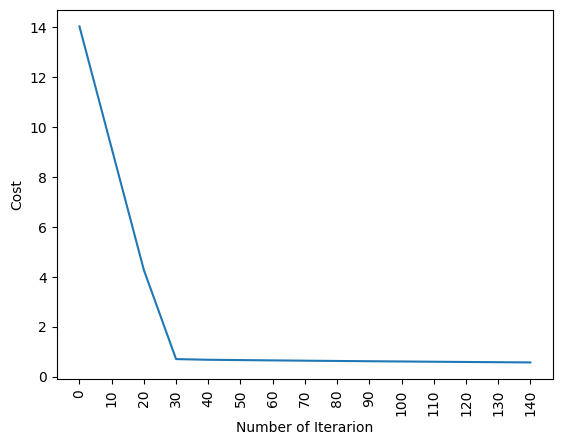

train accuracy: 91.95402298850574 %
test accuracy: 93.54838709677419 %
Learning rate: 0.01
Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


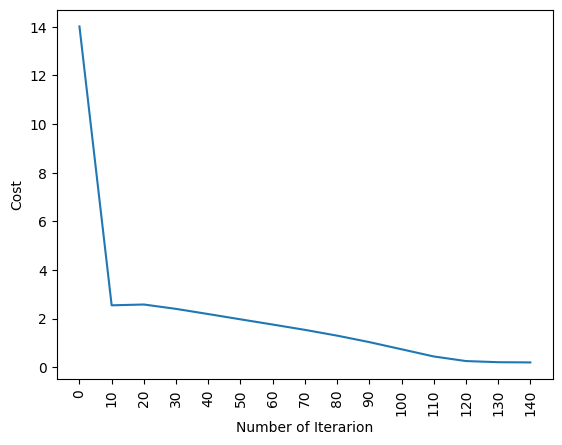

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %
Learning rate: 0.1
Cost after iteration 0: 14.014222
Cost after iteration 10: nan


C:\Users\mayow\AppData\Local\Temp\ipykernel_13740\4098340146.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
C:\Users\mayow\AppData\Local\Temp\ipykernel_13740\4098340146.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)


Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan
Cost after iteration 100: nan
Cost after iteration 110: nan
Cost after iteration 120: nan
Cost after iteration 130: nan
Cost after iteration 140: nan


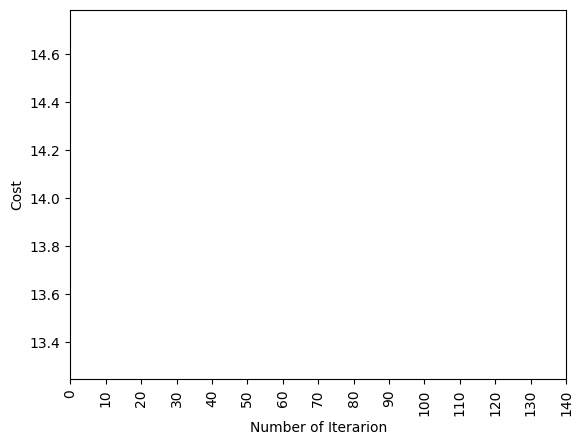

train accuracy: 92.816091954023 %
test accuracy: 95.16129032258064 %
test accuracy: 0.9516129032258065 
train accuracy: 0.9971264367816092 


In [18]:
# Apply manually defined logistic regression with a couple of different learning rate values
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
	print(f"Learning rate: {lr}")
	logistic_regression(x_train, y_train, x_test, y_test, learning_rate=lr, num_iterations=150)

# Apply sklearn based logistic regression and tune learning rate
logreg = linear_model.LogisticRegression(random_state=42, max_iter=1000, C=0.1)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train_1d).score(x_test.T, y_test_1d)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train_1d).score(x_train.T, y_train_1d)))


Best parameters:  {'C': 10}
Best cross-validation accuracy: 0.98
Test accuracy: 0.97
SVM Test accuracy: 0.97
Comparison of different models:
Logistic Regression with GridSearchCV:
Best parameters:  {'C': 10}
Best cross-validation accuracy: 0.98
Test accuracy: 0.97

Manually defined Logistic Regression with different learning rates:
Learning rate: 0.001
Cost after iteration 0: 14.014222
Cost after iteration 10: 9.140082
Cost after iteration 20: 4.266320
Cost after iteration 30: 0.700054
Cost after iteration 40: 0.672925
Cost after iteration 50: 0.660285
Cost after iteration 60: 0.648153
Cost after iteration 70: 0.636504
Cost after iteration 80: 0.625316
Cost after iteration 90: 0.614567
Cost after iteration 100: 0.604235
Cost after iteration 110: 0.594302
Cost after iteration 120: 0.584747
Cost after iteration 130: 0.575551
Cost after iteration 140: 0.566698


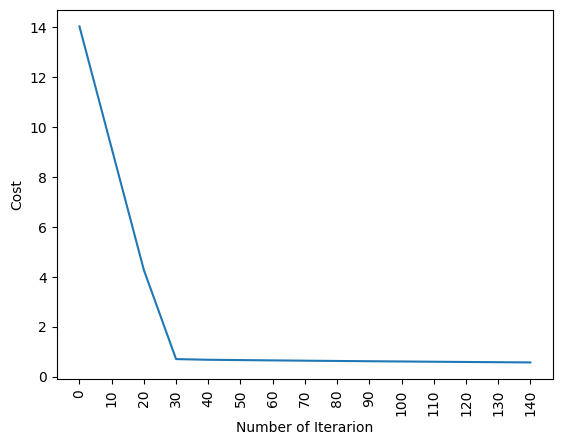

train accuracy: 91.95402298850574 %
test accuracy: 93.54838709677419 %
Learning rate: 0.01
Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


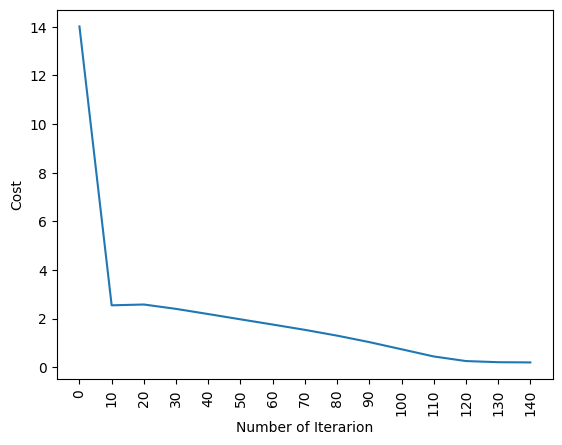

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %
Learning rate: 0.1
Cost after iteration 0: 14.014222


C:\Users\mayow\AppData\Local\Temp\ipykernel_13740\4098340146.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
C:\Users\mayow\AppData\Local\Temp\ipykernel_13740\4098340146.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)


Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan
Cost after iteration 100: nan
Cost after iteration 110: nan
Cost after iteration 120: nan
Cost after iteration 130: nan
Cost after iteration 140: nan


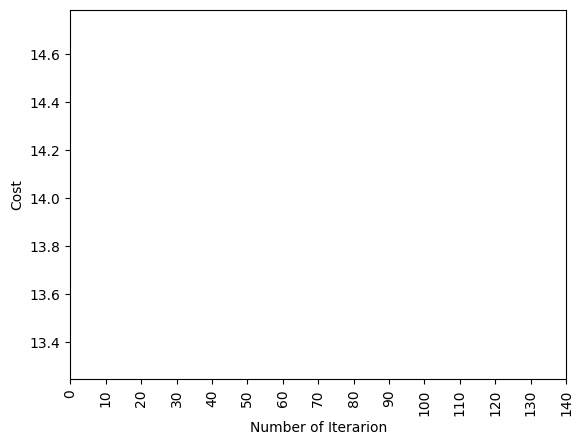

train accuracy: 92.816091954023 %
test accuracy: 95.16129032258064 %

SVM:
SVM Test accuracy: 0.97


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train.T, y_train_1d)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test data
test_accuracy = grid_search.score(x_test.T, y_test_1d)
print("Test accuracy: {:.2f}".format(test_accuracy))



# Apply SVM
svm_model = svm.SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(x_train.T, y_train_1d)

# Evaluate the SVM model on the test data
svm_test_accuracy = svm_model.score(x_test.T, y_test_1d)
print("SVM Test accuracy: {:.2f}".format(svm_test_accuracy))

# Compare all results
print("Comparison of different models:")

# Logistic Regression with GridSearchCV
print("Logistic Regression with GridSearchCV:")
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("Test accuracy: {:.2f}".format(test_accuracy))

# Manually defined Logistic Regression with different learning rates
print("\nManually defined Logistic Regression with different learning rates:")
for lr in learning_rates:
    print(f"Learning rate: {lr}")
    logistic_regression(x_train, y_train, x_test, y_test, learning_rate=lr, num_iterations=150)

# SVM
print("\nSVM:")
print("SVM Test accuracy: {:.2f}".format(svm_test_accuracy))

<a id="20"></a> <br>
## Attributions and License:

Code snippets are based on [https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners/notebook].

This work is licensed under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0) open source license.
